In [8]:
# Import Necessary Library
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
import numpy as np
import time
import matplotlib.pyplot as plt

# Method to run all randomized algorithms
def run_all_randomize_algorithms(optimize_prob, schedule = mlrose.ExpDecay(), max_iters=1000, ga_mimic_iters=300, random_state=1, mimic_vectorize=True):
    algo_list = ['random_hill', 'simulated_anneal', 'genetic_algo', 'mimic']
    result_dict = {}
    for i in algo_list:
        print("Computing", i, ".........")
        #  Record fit time
        if i == 'random_hill':
            start_time = time.time()
            best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(optimize_prob,
                                                      max_attempts = max_iters, max_iters = max_iters, random_state = random_state, curve= True)
            stop_time = time.time()
            time_taken = stop_time - start_time
            color='b-'
            
        elif i == 'simulated_anneal':
            start_time = time.time()
            best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(optimize_prob, schedule = schedule,
                                                      max_attempts = max_iters, max_iters = max_iters, random_state = random_state, curve= True)
            stop_time = time.time()
            time_taken = stop_time - start_time
            color='r-'
        elif i == 'genetic_algo':
            start_time = time.time()
            best_state, best_fitness, fitness_curve = mlrose.genetic_alg(optimize_prob, pop_size=200,
                                                      max_attempts = ga_mimic_iters, max_iters = ga_mimic_iters, random_state = random_state, curve= True)
            stop_time = time.time()
            time_taken = stop_time - start_time
            color='g-'
        elif i == 'mimic':
            start_time = time.time()
            best_state, best_fitness, fitness_curve = mlrose.mimic(optimize_prob, pop_size=200,
                                                      max_attempts = ga_mimic_iters, max_iters = ga_mimic_iters, random_state = random_state, curve= True, fast_mimic=mimic_vectorize)
            stop_time = time.time()
            time_taken = stop_time - start_time
            color='C1'
        result_dict[i] = {'best_state':best_state,'best_fitness':best_fitness, 'fitness_curve':fitness_curve, 'color':color, 'time_taken': time_taken}
    return result_dict

## 1. Four Peaks Problem

Computing random_hill .........
Computing simulated_anneal .........
Computing genetic_algo .........
Computing mimic .........


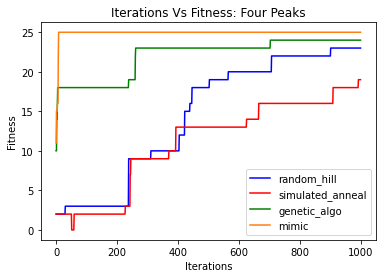

In [9]:
# Four Peaks
fitness = mlrose.FourPeaks(t_pct=0.15)
problem = mlrose.DiscreteOpt(length = 100, fitness_fn = fitness, maximize = True)
# run_all_randomize_algorithms(problem, state)
results = run_all_randomize_algorithms(problem, max_iters=1000, ga_mimic_iters=1000)
# Plot graph!! 
# Iterations & Fitness !! 
fig, ax = plt.subplots()
for key in results:
    ax.plot(range(0,len(results[key]['fitness_curve'])), results[key]['fitness_curve'], results[key]['color'], label=key)

ax.set_xlabel('Iterations')
ax.set_ylabel('Fitness')
ax.set_title('Iterations Vs Fitness: Four Peaks')
ax.legend()
plt.show(fig)

Computing random_hill .........
Computing simulated_anneal .........
Computing genetic_algo .........
Computing mimic .........
Iteration count: 100
Computing random_hill .........
Computing simulated_anneal .........
Computing genetic_algo .........
Computing mimic .........
Iteration count: 200
Computing random_hill .........
Computing simulated_anneal .........
Computing genetic_algo .........
Computing mimic .........
Iteration count: 300
Computing random_hill .........
Computing simulated_anneal .........
Computing genetic_algo .........
Computing mimic .........
Iteration count: 400
Computing random_hill .........
Computing simulated_anneal .........
Computing genetic_algo .........
Computing mimic .........
Iteration count: 500
Computing random_hill .........
Computing simulated_anneal .........
Computing genetic_algo .........
Computing mimic .........
Iteration count: 600
Computing random_hill .........
Computing simulated_anneal .........
Computing genetic_algo .........
Comp

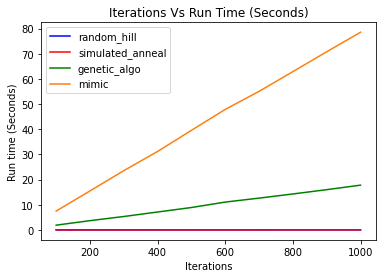

In [4]:
# Runtime and Iterations
# Four Peaks
fitness = mlrose.FourPeaks(t_pct=0.15)
problem = mlrose.DiscreteOpt(length = 100, fitness_fn = fitness, maximize = True)
iterate_range = 1000
step = 100
run_time = {}
for i in range(100, iterate_range+1, step):
    n_result = run_all_randomize_algorithms(problem, max_iters=i, ga_mimic_iters=i)
    print("Iteration count:", i)
    for key in n_result:
        if i == 100:
            run_time[key] = [n_result[key]['time_taken']]
        else:
            run_time[key].append(n_result[key]['time_taken'])

color_list = {'random_hill':'b-', 'simulated_anneal':'r-', 'genetic_algo':'g-', 'mimic':'C1'}
fig, ax = plt.subplots()
for key in run_time:
    ax.plot(list(range(100, iterate_range+1, step)), run_time[key], color_list[key], label=key)

ax.set_xlabel('Iterations')
ax.set_ylabel('Run time (Seconds)')
ax.set_title('Iterations Vs Run Time (Seconds)')
ax.legend()
plt.show(fig)

In [5]:
for i in run_time.keys():
    print("Four Peaks 1000 iterations:", i, run_time[i][9])

Four Peaks 1000 iterations: random_hill 0.015625
Four Peaks 1000 iterations: simulated_anneal 0.03121805191040039
Four Peaks 1000 iterations: genetic_algo 17.786161184310913
Four Peaks 1000 iterations: mimic 78.5363974571228


In [6]:
# Variying Mutation Prop for GA
fitness = mlrose.FourPeaks(t_pct=0.15)
problem = mlrose.DiscreteOpt(length = 100, fitness_fn = fitness, maximize = True)

keep_pct_val = [ 0.1 , 0.2, 0.3]
keep_pct_key = ['Mutation Prob: 0.1', 'Mutation Prob: 0.2', 'Mutation Prob: 0.3']
schedule_color = ['r-', 'g-', 'b-', 'C1', 'C5']
result_dict_ga = {'Mutation Prob: 0.1':{'best_state':'', 'best_fitness':'', 'fitness_curve':'', 'color':''}, 
                  'Mutation Prob: 0.2':{'best_state':'', 'best_fitness':'', 'fitness_curve':'', 'color':''}, 
                  'Mutation Prob: 0.3':{'best_state':'', 'best_fitness':'', 'fitness_curve':'', 'color':''}
                 }
ga_iterations = 1000
for index, val in enumerate(keep_pct_key):
    print(val)
    best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, pop_size=200, mutation_prob=keep_pct_val[index],
                max_attempts = ga_iterations, max_iters = ga_iterations, random_state = 1, curve= True)
    result_dict_ga[keep_pct_key[index]]['best_state'] = best_state
    result_dict_ga[keep_pct_key[index]]['best_fitness'] = best_fitness
    result_dict_ga[keep_pct_key[index]]['fitness_curve'] = fitness_curve
    result_dict_ga[keep_pct_key[index]]['color'] = schedule_color[index]

Mutation Prob: 0.1
Mutation Prob: 0.2
Mutation Prob: 0.3


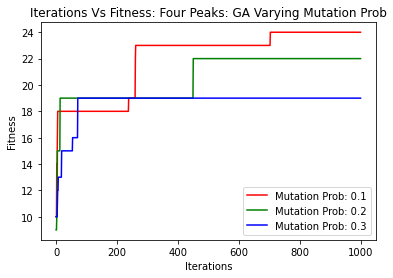

In [7]:
# Plot graph!! 
# Iterations & Fitness !!
fig, ax = plt.subplots()
for key in keep_pct_key:
    ax.plot(range(0,len(result_dict_ga[key]['fitness_curve'])), result_dict_ga[key]['fitness_curve'], result_dict_ga[key]['color'], label=key)

ax.set_xlabel('Iterations')
ax.set_ylabel('Fitness')
ax.set_title('Iterations Vs Fitness: Four Peaks: GA Varying Mutation Prob')
ax.legend()
plt.show(fig)

## 2.Traveling Salesman

Computing random_hill .........
Computing simulated_anneal .........
Computing genetic_algo .........
Computing mimic .........


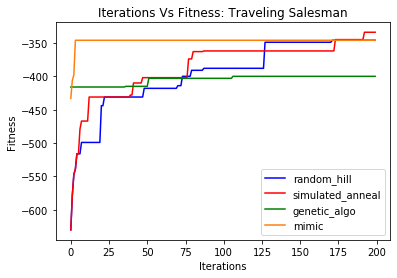

In [17]:
# Traveling Salesman
#  MIMIC without vectorize !!
data = [[0 ,29 ,82 ,46 ,68 ,52 ,72 ,42 ,51 ,55 ,29 ,74 ,23 ],
 [29,  0, 55, 46, 42, 43, 43, 23, 23, 31, 41, 51, 11] ,
 [82, 55,  0, 68, 46, 55, 23, 43, 41, 29, 79, 21, 64] ,
 [46, 46, 68,  0, 82, 15, 72, 31, 62, 42, 21, 51, 51] ,
 [68, 42, 46, 82,  0, 74, 23, 52, 21, 46, 82, 58, 46] ,
 [52, 43, 55, 15, 74,  0, 61, 23, 55, 31, 33, 37, 51] ,
 [72, 43, 23, 72, 23, 61,  0, 42, 23, 31, 77, 37, 51] ,
 [42, 23, 43, 31, 52, 23, 42,  0, 33, 15, 37, 33, 33] ,
 [51, 23, 41, 62, 21, 55, 23, 33,  0, 29, 62, 46, 29] ,
 [55, 31, 29, 42, 46, 31, 31, 15, 29,  0, 51, 21, 41] ,
 [29, 41, 79, 21, 82, 33, 77, 37, 62, 51,  0, 65, 42] ,
 [74, 51, 21, 51, 58, 37, 37, 33, 46, 21, 65,  0, 61] ,
 [23, 11, 64, 51, 46, 51, 51, 33, 29, 41, 42, 61,  0] ]

# format city coordinate
city_coor_list = []
for i, val in enumerate(data):
    for j, val in enumerate(data[i]):
        if data[i][j] == 0:
            continue
        city_coor = (i, j, data[i][j])
        city_coor_list.append(city_coor)

fitness_fn_dists = mlrose.TravellingSales(distances = city_coor_list)
problem_fit = mlrose.TSPOpt(length = 13, fitness_fn = fitness_fn_dists, maximize=False)

results = run_all_randomize_algorithms(problem_fit, max_iters=200, ga_mimic_iters=200, mimic_vectorize=False)
# Plot graph!! 
# Iterations & Fitness !! 
fig, ax = plt.subplots()
for key in results:
    ax.plot(range(0,len(results[key]['fitness_curve'])), results[key]['fitness_curve'], results[key]['color'], label=key)

ax.set_xlabel('Iterations')
ax.set_ylabel('Fitness')
ax.set_title('Iterations Vs Fitness: Traveling Salesman')
ax.legend()
plt.show(fig)

Computing random_hill .........
Computing simulated_anneal .........
Computing genetic_algo .........
Computing mimic .........
Iteration: 100 Time Taken 54.86716318130493
Computing random_hill .........
Computing simulated_anneal .........
Computing genetic_algo .........
Computing mimic .........
Iteration: 200 Time Taken 110.00222587585449
Computing random_hill .........
Computing simulated_anneal .........
Computing genetic_algo .........
Computing mimic .........
Iteration: 300 Time Taken 157.15646529197693
Computing random_hill .........
Computing simulated_anneal .........
Computing genetic_algo .........
Computing mimic .........
Iteration: 400 Time Taken 209.34662413597107
Computing random_hill .........
Computing simulated_anneal .........
Computing genetic_algo .........
Computing mimic .........
Iteration: 500 Time Taken 271.22218108177185
Computing random_hill .........
Computing simulated_anneal .........
Computing genetic_algo .........
Computing mimic .........
Iteratio

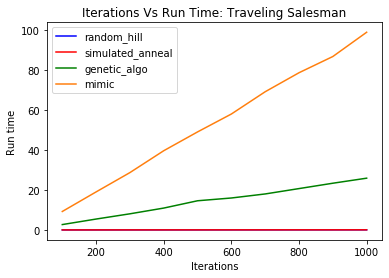

In [18]:
# TSP Runtime
fitness_fn_dists = mlrose.TravellingSales(distances = city_coor_list)
problem_tsp = mlrose.TSPOpt(length = 13, fitness_fn = fitness_fn_dists, maximize=False)
iterate_range = 1000
step = 100
run_time_tsp = {}
for i in range(100, iterate_range+1, step):
    n_result = run_all_randomize_algorithms(problem_tsp, max_iters=i, ga_mimic_iters=i, mimic_vectorize=False)
    
    for key in n_result:
        if i == 100:
            run_time_tsp[key] = [n_result[key]['time_taken']]
        else:
            run_time_tsp[key].append(n_result[key]['time_taken'])
    print("Iteration:", i, "Time Taken", n_result[key]['time_taken'])
            
# Iterations & run time !!
color_list = {'random_hill':'b-', 'simulated_anneal':'r-', 'genetic_algo':'g-', 'mimic':'C1'}
fig, ax = plt.subplots()
for key in run_time_tsp:
    ax.plot(list(range(100, iterate_range+1, step)), run_time[key], color_list[key], label=key)

ax.set_xlabel('Iterations')
ax.set_ylabel('Run time')
ax.set_title('Iterations Vs Run Time: Traveling Salesman')
ax.legend()
plt.show(fig)

In [51]:
# Runtime
for i in run_time_tsp.keys():
    print("Four Peaks 1000 iterations:", i, run_time_tsp[i][9])

Four Peaks 1000 iterations: random_hill 0.43483591079711914
Four Peaks 1000 iterations: simulated_anneal 0.45977020263671875
Four Peaks 1000 iterations: genetic_algo 127.873850107193
Four Peaks 1000 iterations: mimic 676.8409395217896


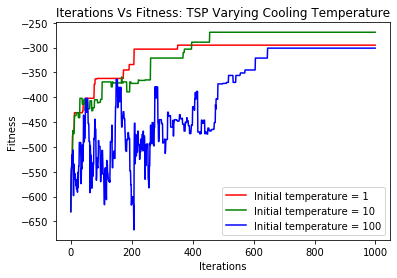

In [20]:
# Varying temperature
schedule_list = [mlrose.ExpDecay(init_temp=1), mlrose.ExpDecay(init_temp=10), mlrose.ExpDecay(init_temp=100)]
schedule_key = ['Initial temperature = 1', 'Initial temperature = 10', 'Initial temperature = 100']
schedule_color = ['r-', 'g-', 'b-', 'C1', 'C5']
result_dict_sa = {}
sa_iterations = 1000
for index, val in enumerate(schedule_list):
    best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem_tsp, schedule = val,
max_attempts = sa_iterations, max_iters = sa_iterations, random_state = 1, curve= True)
    result_dict_sa[schedule_key[index]] = {'best_state':'', 'best_fitness':'', 'fitness_curve':''}
    result_dict_sa[schedule_key[index]]['best_state'] = best_state
    result_dict_sa[schedule_key[index]]['best_fitness'] = best_fitness
    result_dict_sa[schedule_key[index]]['fitness_curve'] = fitness_curve
    
    result_dict_sa[schedule_key[index]]['color'] = schedule_color[index]
#     result_dict_sa = run_all_randomize_algorithms(problem, max_iters=1000, ga_mimic_iters=1000, mimic_vectorize=False)

# Plot graph!! 
# Iterations & Fitness !!
fig, ax = plt.subplots()
for key in schedule_key:
    ax.plot(range(0,len(result_dict_sa[key]['fitness_curve'])), result_dict_sa[key]['fitness_curve'], result_dict_sa[key]['color'], label=key)

ax.set_xlabel('Iterations')
ax.set_ylabel('Fitness')
ax.set_title('Iterations Vs Fitness: TSP Varying Cooling Temperature')
ax.legend()
plt.show(fig)

## 3. N Queen Optimization

Computing random_hill .........
Computing simulated_anneal .........
Computing genetic_algo .........
Computing mimic .........


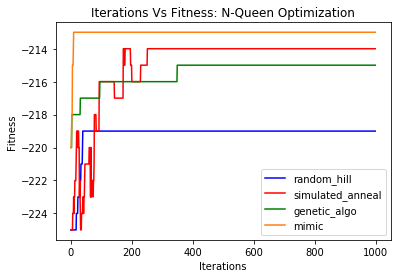

In [32]:
# N Queens
fitness = mlrose.Queens()
problem = mlrose.DiscreteOpt(length = 30, fitness_fn = fitness, maximize = False)
# run_all_randomize_algorithms(problem, state)
results = run_all_randomize_algorithms(problem, max_iters=1000, ga_mimic_iters=1000)
# Plot graph!! 
# Iterations & Fitness !! 
fig, ax = plt.subplots()
for key in results:
    ax.plot(range(0,len(results[key]['fitness_curve'])), results[key]['fitness_curve'], results[key]['color'], label=key)

ax.set_xlabel('Iterations')
ax.set_ylabel('Fitness')
ax.set_title('Iterations Vs Fitness: N-Queen Optimization')
ax.legend()
plt.show(fig)

In [41]:
keep_pct_val = [0.1 , 0.2, 0.3]
keep_pct_key = [ 'Sample to keep: 0.1', 'Sample to keep: 0.2', 'Sample to keep: 0.3']
schedule_color = ['r-', 'g-', 'b-', 'C1', 'C5']
result_dict_mimic = {'Sample to keep: 0.1':{'best_state':'', 'best_fitness':'', 'fitness_curve':'', 'color':''}, 
                  'Sample to keep: 0.2':{'best_state':'', 'best_fitness':'', 'fitness_curve':'', 'color':''}, 
                  'Sample to keep: 0.3':{'best_state':'', 'best_fitness':'', 'fitness_curve':'', 'color':''}
                 }
ga_iterations = 1000
for index, val in enumerate(keep_pct_key):
    print(val)
    best_state, best_fitness, fitness_curve = mlrose.mimic(problem, pop_size=200, keep_pct=keep_pct_val[index],
                max_attempts = ga_iterations, max_iters = ga_iterations, random_state = 1, curve= True, fast_mimic=True)
    result_dict_mimic[keep_pct_key[index]]['best_state'] = best_state
    result_dict_mimic[keep_pct_key[index]]['best_fitness'] = best_fitness
    result_dict_mimic[keep_pct_key[index]]['fitness_curve'] = fitness_curve
    result_dict_mimic[keep_pct_key[index]]['color'] = schedule_color[index]

Sample to keep: 0.1
Sample to keep: 0.2
Sample to keep: 0.3


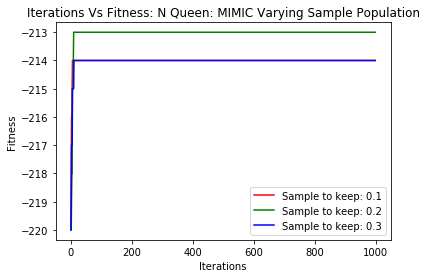

In [43]:
# Plot graph!! 
# Iterations & Fitness !!
fig, ax = plt.subplots()
for key in keep_pct_key:
    ax.plot(range(0,len(result_dict_mimic[key]['fitness_curve'])), result_dict_mimic[key]['fitness_curve'], result_dict_mimic[key]['color'], label=key)

ax.set_xlabel('Iterations')
ax.set_ylabel('Fitness')
ax.set_title('Iterations Vs Fitness: N Queen: MIMIC Varying Sample Population')
ax.legend()
plt.show(fig)

In [54]:
# Time Taken
for i in results.keys():
    print("Four Peaks 1000 iterations:", i, results[i]['time_taken'])

Four Peaks 1000 iterations: random_hill 0.700127124786377
Four Peaks 1000 iterations: simulated_anneal 0.7829043865203857
Four Peaks 1000 iterations: genetic_algo 178.25789546966553
Four Peaks 1000 iterations: mimic 175.8773865699768


# Neural Networks Optimization

In [56]:
# Neural Networks
import numpy as np
import pandas as pd
import time
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

# Datasets
htru = pd.read_csv('datasets/HTRU_2.csv', header=None)
htru.columns = ['mean_intregrated', 'sd_integrated', 'kurtosis_integrated', 'skew_integrated','mean_dmsnr', 'sd_dmsnr', 'kurtossi_dmsnr', 'skew_dmsnr', 'labels']
# Scaled
scaling = StandardScaler()
hrtu_scaled = scaling.fit_transform(htru.drop('labels', axis=1))
features = hrtu_scaled
labels = htru['labels']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=42)
X_train_real, X_validation, y_train_real, y_validation = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
random_state=42

In [81]:
# Compare results, 1000 iterations with back propagation!! 
# At 1000 iterations!!, compare it!! 
#  Runtime & Performances 
iterations = 1000
algo_list = ['random_hill', 'simulated_anneal', 'genetic_algo']
hidden_nodes = [10, 32]
activation = 'sigmoid'
score_dict_comp = {
              'random_hill':{'loss':[], 'test_score':[], 'train_score':[],'fit_times':[], 'fit_curve':[], 'model':''}, 
              'simulated_anneal': {'loss':[],'test_score':[], 'train_score':[],'fit_times':[], 'fit_curve':[], 'model':''}, 
              'genetic_algo':{'loss':[],'test_score':[], 'train_score':[],'fit_times':[], 'fit_curve':[], 'model':''}
             }
for algo in algo_list:
    print("Computing NN Iterations", iterations, algo ,".........")
    if algo == 'random_hill':
        nn_model_new2 = mlrose.NeuralNetwork(hidden_nodes = hidden_nodes, activation = activation, \
                             algorithm = 'random_hill_climb', max_iters = iterations, \
                             bias = True, is_classifier = True, learning_rate = 0.001, \
                             early_stopping = False,  clip_max=5,\
                             random_state = random_state, curve=True)

    elif algo == 'simulated_anneal':
        nn_model_new2 = mlrose.NeuralNetwork(hidden_nodes = hidden_nodes, activation = activation, \
                             algorithm = 'simulated_annealing', schedule=schedule, max_iters = iterations, \
                             bias = True, is_classifier = True, learning_rate = 0.001, \
                             early_stopping = False,  clip_max=5,\
                             random_state = random_state, curve=True)

    elif algo == 'genetic_algo':
        nn_model_new2 = mlrose.NeuralNetwork(hidden_nodes = hidden_nodes, activation = activation, \
                             algorithm = 'genetic_alg', max_iters = iterations, \
                             bias = True, is_classifier = True, learning_rate = 0.001, \
                             early_stopping = False,  clip_max=5, \
                             random_state = random_state, curve=True)
    start_time = time.time()
    nn_model_new2.fit(X_train, y_train)
    stop_time = time.time()
    time_taken = stop_time - start_time
    y_pred = nn_model_new2.predict(X_test)
    score_dict_comp[algo]['loss'].append(nn_model_new2.loss)
    score_dict_comp[algo]['test_score'].append(accuracy_score(y_test, y_pred))
    score_dict_comp[algo]['train_score'].append(nn_model_new2.score(X_train, y_train))
    score_dict_comp[algo]['fit_times'].append(time_taken)
    score_dict_comp[algo]['fit_curve'].append(nn_model_new2.fitness_curve )
    score_dict_comp[algo]['model']= nn_model_new2
    print('Training 1000 iterations:','loss', nn_model_new2.loss, 'test', accuracy_score(y_test, y_pred), 'train_score', nn_model_new2.score(X_train, y_train), 'time_taken', time_taken)

Computing NN Iterations 1000 random_hill .........
Training 1000 iterations: loss 0.43840824415622437 test 0.9109531064838328 train_score 0.9071803852889667 time_taken 30.45390295982361
Computing NN Iterations 1000 simulated_anneal .........
Training 1000 iterations: loss 0.4467562393564761 test 0.9109531064838328 train_score 0.9071803852889667 time_taken 41.991605043411255
Computing NN Iterations 1000 genetic_algo .........
Training 1000 iterations: loss 0.1269616161927336 test 0.9708820044015575 train_score 0.9697272954716037 time_taken 4412.04740357399


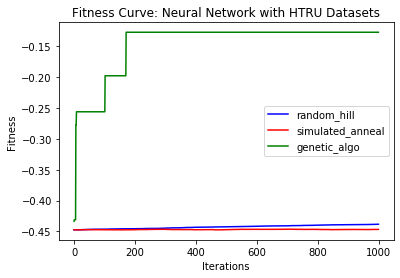

In [88]:
# Plot graph!! 
# Learning Curve
algo_list = ['random_hill', 'simulated_anneal', 'genetic_algo']
algo_color = ['b-', 'r-', 'g-']
fig, ax = plt.subplots()
for index, algo in enumerate(algo_list):
    ax.plot(range(0,len(score_dict_comp[algo]['fit_curve'][0])) , score_dict_comp[algo]['fit_curve'][0], algo_color[index], label=algo)

ax.set_xlabel('Iterations')
ax.set_ylabel('Fitness')
ax.set_title('Fitness Curve: Neural Network with HTRU Datasets')
ax.legend()
plt.show(fig)

In [91]:
# Try increasing to 5000 iteration for RandomHill and Simulated Annealing
# At 1000 iterations!!, compare it!! 
#  Runtime & Performances 
iterations = 20000
algo_list = ['random_hill', 'simulated_anneal']
hidden_nodes = [10, 32]
activation = 'sigmoid'
score_dict_comp_new = {
              'random_hill':{'loss':[], 'test_score':[], 'train_score':[],'fit_times':[], 'fit_curve':[], 'model':''}, 
              'simulated_anneal': {'loss':[],'test_score':[], 'train_score':[],'fit_times':[], 'fit_curve':[], 'model':''}, 
              'genetic_algo':{'loss':[],'test_score':[], 'train_score':[],'fit_times':[], 'fit_curve':[], 'model':''}
             }
for algo in algo_list:
    print("Computing NN Iterations", iterations, algo ,".........")
    if algo == 'random_hill':
        nn_model_new2 = mlrose.NeuralNetwork(hidden_nodes = hidden_nodes, activation = activation, \
                             algorithm = 'random_hill_climb', max_iters = iterations, \
                             bias = True, is_classifier = True, learning_rate = 0.001, \
                             early_stopping = False,  clip_max=5,\
                             random_state = random_state, curve=True)

    elif algo == 'simulated_anneal':
        nn_model_new2 = mlrose.NeuralNetwork(hidden_nodes = hidden_nodes, activation = activation, \
                             algorithm = 'simulated_annealing', schedule=schedule, max_iters = iterations, \
                             bias = True, is_classifier = True, learning_rate = 0.001, \
                             early_stopping = False,  clip_max=5,\
                             random_state = random_state, curve=True)

    start_time = time.time()
    nn_model_new2.fit(X_train, y_train)
    stop_time = time.time()
    time_taken = stop_time - start_time
    y_pred = nn_model_new2.predict(X_test)
    score_dict_comp_new[algo]['loss'].append(nn_model_new2.loss)
    score_dict_comp_new[algo]['test_score'].append(accuracy_score(y_test, y_pred))
    score_dict_comp_new[algo]['train_score'].append(nn_model_new2.score(X_train, y_train))
    score_dict_comp_new[algo]['fit_times'].append(time_taken)
    score_dict_comp_new[algo]['fit_curve'].append(nn_model_new2.fitness_curve )
    score_dict_comp_new[algo]['model']= nn_model_new2
    print('Training 20000 iterations:','loss', nn_model_new2.loss, 'test', accuracy_score(y_test, y_pred), 'train_score', nn_model_new2.score(X_train, y_train), 'time_taken', time_taken)

Computing NN Iterations 20000 random_hill .........
Training 20000 iterations: loss 0.32433212097228137 test 0.9109531064838328 train_score 0.9071803852889667 time_taken 690.173365354538
Computing NN Iterations 20000 simulated_anneal .........
Training 20000 iterations: loss 0.4380753221795101 test 0.9109531064838328 train_score 0.9071803852889667 time_taken 874.3196635246277


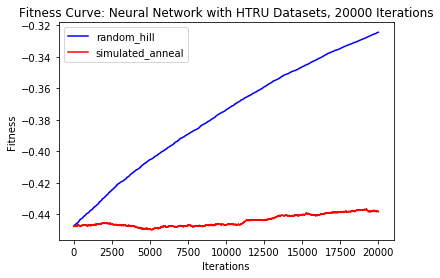

In [92]:
# Plot graph!! 
# Learning Curve
algo_list = ['random_hill', 'simulated_anneal']
algo_color = ['b-', 'r-', 'g-']
fig, ax = plt.subplots()
for index, algo in enumerate(algo_list):
    ax.plot(range(0,len(score_dict_comp_new[algo]['fit_curve'][0])) , score_dict_comp_new[algo]['fit_curve'][0], algo_color[index], label=algo)

ax.set_xlabel('Iterations')
ax.set_ylabel('Fitness')
ax.set_title('Fitness Curve: Neural Network with HTRU Datasets, 20000 Iterations')
ax.legend()
plt.show(fig)

In [99]:
# Back propagtions using previous assignment codes
from sklearn.neural_network import MLPClassifier

param_grid = [{
    'activation': ['relu', 'logistic', 'tanh'],
    'hidden_layer_sizes':[(10,), (10,2), (10,4), (10, 8), (10, 16), (10, 32)]
}]

# Model from
ann_clf = MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 32), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

start_time = time.time()
ann_clf.fit(X_train, y_train)
stop_time = time.time()
print(f"Fit time: {stop_time - start_time} seconds")
pred_ann = ann_clf.predict(X_test)
print("Train Score:", ann_clf.score(X_train, y_train))
print("Test Score:", accuracy_score(y_test, pred_ann))
# get_all_metrics_score(pred_ann, y_test)

Fit time: 6.329006910324097 seconds
Train Score: 0.9805687599032608
Test Score: 0.9781615033011681
